# Quantum Volume (QV)

In [1]:
%load_ext autoreload
%autoreload 2

## Choose (or define) a backend

Choose either a real hardware backend or a fake backend provided through the [Qiskit on IQM](https://github.com/iqm-finland/qiskit-on-iqm/tree/main/src/iqm/qiskit_iqm/fake_backends)  package.

In [2]:
#backend = "fakeadonis"
backend = "fakeapollo"
#backend = "garnet"
#backend = "deneb"
#backend = "fakedeneb"

## Set IQM Token if using Resonance

In [3]:
# import os
# os.environ["IQM_TOKEN"] = ""

## Quantum Volume Configuration

In [4]:
from iqm.benchmarks.quantum_volume.quantum_volume import *

In [5]:
EXAMPLE_QV = QuantumVolumeConfiguration(
    num_circuits=500,
    shots=2**8,
    calset_id=None,
    num_sigmas=2,
    choose_qubits_routine="custom",
    custom_qubits_array=[[0,1,2,3], [0,1,3,4]], # depends on backend
    qiskit_optim_level=3,
    optimize_sqg=True,
    routing_method="sabre",
    physical_layout="fixed",
    max_gates_per_batch=60_000,
    rem=True,
    mit_shots=1_000,
)

## Run the experiment

In [6]:
benchmark_qv = QuantumVolumeBenchmark(backend, EXAMPLE_QV)
run0_qv = benchmark_qv.run()

2025-02-10 16:36:40,601 - iqm.benchmarks.logging_config - INFO - Executing QV on qubits [0, 1, 2, 3]
2025-02-10 16:36:40,952 - iqm.benchmarks.logging_config - INFO - Successfully generated all 500 circuits to be executed
2025-02-10 16:36:40,953 - iqm.benchmarks.logging_config - INFO - Will transpile according to "fixed" physical layout
2025-02-10 16:36:40,953 - iqm.benchmarks.logging_config - INFO - Transpiling for backend IQMFakeApolloBackend with optimization level 3, sabre routing method and SQG optimization all circuits
2025-02-10 16:36:52,740 - iqm.benchmarks.logging_config - INFO - Submitting batch with 500 circuits corresponding to qubits [0, 1, 2, 3]
2025-02-10 16:36:52,754 - iqm.benchmarks.logging_config - INFO - max_gates_per_batch restriction: submitting subbatch #1 with 500 circuits corresponding to qubits [0, 1, 2, 3]
2025-02-10 16:36:52,767 - iqm.benchmarks.logging_config - INFO - Job for layout [0, 1, 2, 3] submitted successfully!
2025-02-10 16:36:52,827 - iqm.benchmarks

One can perform a separate run of the benchmark (also possible with a different configuration)

In [7]:
#run1_qv = benchmark_qv.run()

## Inspect the circuits

In [8]:
display(run0_qv.circuits["untranspiled_circuits"][str([0,1,2,3])].circuits[0].draw())
display(run0_qv.circuits["transpiled_circuits"][str([0,1,2,3])].circuits[0].draw())

┌──────────┐┌──────────┐┌──────────┐            »
   q_0: ────────────┤1         ├┤0         ├┤1         ├────────────»
        ┌──────────┐│          ││  Unitary ││          │┌──────────┐»
   q_1: ┤1         ├┤          ├┤1         ├┤  Unitary ├┤1         ├»
        │  Unitary ││  Unitary │├──────────┤│          ││          │»
   q_2: ┤0         ├┤          ├┤1         ├┤0         ├┤  Unitary ├»
        └──────────┘│          ││  Unitary │└──────────┘│          │»
   q_3: ────────────┤0         ├┤0         ├────────────┤0         ├»
                    └──────────┘└──────────┘            └──────────┘»
meas: 4/════════════════════════════════════════════════════════════»
                                                                    »
«        ┌──────────┐             ░ ┌─┐         
«   q_0: ┤1         ├─────────────░─┤M├─────────
«        │          │┌──────────┐ ░ └╥┘┌─┐      
«   q_1: ┤  Unitary ├┤1         ├─░──╫─┤M├──────
«        │          ││          │ ░  ║ └╥┘┌─┐   
«   q_2: ┤0         ├┤  Unitary ├─░──╫──╫─┤M├───
«        └──────────┘│          │ ░  ║  ║ └╥┘┌─┐
«   q_3: ────────────┤0         ├─░──╫──╫──╫─┤M├
«                    └──────────┘ ░  ║  ║  ║ └╥┘
«meas: 4/════════════════════════════╩══╩══╩══╩═
«                                    0  1  2  3

global phase: 0.42486
      ┌──────────────────┐    ┌──────────────────┐    ┌───────────────────┐   »
 q_0: ┤ R(1.076,0.15628) ├─■──┤ R(1.1078,-1.813) ├──■─┤ R(0.35509,-1.813) ├─■─»
      ├──────────────────┤ │  └─┬──────────────┬─┘  │ └─┬───────────────┬─┘ │ »
 q_1: ┤ R(1.3817,4.3125) ├─■────┤ R(π/2,6.136) ├────■───┤ R(π/2,12.414) ├───■─»
      ├──────────────────┤   ┌──┴──────────────┴──┐   ┌─┴───────────────┴─┐   »
 q_2: ┤ R(1.9371,3.8425) ├─■─┤ R(0.92481,0.95003) ├─■─┤ R(0.52937,4.0916) ├─■─»
      ├─────────────────┬┘ │ └─┬───────────────┬──┘ │ └─┬───────────────┬─┘ │ »
 q_3: ┤ R(2.289,3.3004) ├──■───┤ R(π/2,5.9079) ├────■───┤ R(π/2,12.188) ├───■─»
      └─────────────────┘      └───────────────┘        └───────────────┘     »
 q_4: ────────────────────────────────────────────────────────────────────────»
                                                                              »
 q_5: ────────────────────────────────────────────────────────────────────────»
                                                                              »
 q_6: ────────────────────────────────────────────────────────────────────────»
                                                                              »
 q_7: ────────────────────────────────────────────────────────────────────────»
                                                                              »
 q_8: ────────────────────────────────────────────────────────────────────────»
                                                                              »
 q_9: ────────────────────────────────────────────────────────────────────────»
                                                                              »
q_10: ────────────────────────────────────────────────────────────────────────»
                                                                              »
q_11: ────────────────────────────────────────────────────────────────────────»
                                                                              »
q_12: ────────────────────────────────────────────────────────────────────────»
                                                                              »
q_13: ────────────────────────────────────────────────────────────────────────»
                                                                              »
q_14: ────────────────────────────────────────────────────────────────────────»
                                                                              »
q_15: ────────────────────────────────────────────────────────────────────────»
                                                                              »
q_16: ────────────────────────────────────────────────────────────────────────»
                                                                              »
q_17: ────────────────────────────────────────────────────────────────────────»
                                                                              »
q_18: ────────────────────────────────────────────────────────────────────────»
                                                                              »
q_19: ────────────────────────────────────────────────────────────────────────»
                                                                              »
 c: 4/════════════════════════════════════════════════════════════════════════»
                                                                              »
«      ┌────────────────────┐   ┌────────────────┐   ┌────────────────┐   »
« q_0: ┤ R(1.7774,-0.62399) ├─■─┤ R(π/2,-4.8384) ├─■─┤ R(π/2,-4.8384) ├─■─»
«      └┬──────────────────┬┘ │ └────────────────┘ │ └────────────────┘ │ »
« q_1: ─┤ R(1.6397,16.898) ├──┼────────────────────┼────────────────────┼─»
«       ├──────────────────┤  │                    │                    │ »
« q_2: ─┤ R(2.3991,8.9156) ├──┼────────────────────┼────────────────────┼─»
«       ├─────────────────┬┘  │ ┌───────────────┐  │ ┌───────────────┐  │ »
« q_3:

## Perform Analysis

In [10]:
result0_qv = benchmark_qv.analyze()

2025-02-10 16:38:50,564 - iqm.benchmarks.logging_config - INFO - Noiseless simulation and post-processing for layout [0, 1, 2, 3]
2025-02-10 16:38:51,511 - iqm.benchmarks.logging_config - INFO - Noiseless simulation and post-processing for layout [0, 1, 3, 4]
2025-02-10 16:38:52,223 - iqm.benchmarks.logging_config - INFO - REM post-processing for layout [0, 1, 2, 3] with 1000 shots
2025-02-10 16:38:52,256 - iqm.benchmarks.logging_config - INFO - REM post-processing for layout [0, 1, 3, 4] with 1000 shots


In [11]:
#result1_qv = benchmark.analyze(run_index=0)

List all the keys in the attributes of the dataset

In [12]:
attr_keys = sorted([str(x) for x in list(result0_qv.dataset.attrs.keys())])
for k in attr_keys:
    print(k)

0
1
REM_quasidistributions
backend_configuration_name
backend_name
benchmark
calset_id
choose_qubits_routine
custom_qubits_array
execution_timestamp
max_gates_per_batch
mit_shots
num_circuits
num_sigmas
optimize_sqg
physical_layout
qiskit_optim_level
rem
routing_method
session_timestamp
shots


The data for specific experiments is indexed by 0,1,..., e.g., for the first experiment:

In [13]:
for k in result0_qv.dataset.attrs[0].keys():
    print(k)

qubits
qv_results_type
time_circuit_generation
time_transpilation
time_batching
time_submit
time_retrieve
all_job_metadata
operation_counts
cumulative_average_heavy_output_probability
cumulative_stddev_heavy_output_probability
heavy_output_probabilities
REM_cumulative_average_heavy_output_probability
REM_cumulative_stddev_heavy_output_probability
REM_heavy_output_probabilities


In [14]:
result0_qv.dataset.attrs[0]["heavy_output_probabilities"]

[0.6640625,
 0.7109375,
 0.7109375,
 0.609375,
 0.625,
 0.55078125,
 0.6015625,
 0.65625,
 0.828125,
 0.5625,
 0.6171875,
 0.63671875,
 0.72265625,
 0.67578125,
 0.609375,
 0.58984375,
 0.62109375,
 0.61328125,
 0.67578125,
 0.64453125,
 0.59765625,
 0.6875,
 0.60546875,
 0.56640625,
 0.73828125,
 0.54296875,
 0.6328125,
 0.64453125,
 0.5703125,
 0.65234375,
 0.70703125,
 0.640625,
 0.6484375,
 0.6015625,
 0.6953125,
 0.69140625,
 0.7265625,
 0.640625,
 0.6796875,
 0.671875,
 0.69140625,
 0.703125,
 0.64453125,
 0.7109375,
 0.63671875,
 0.65625,
 0.6015625,
 0.765625,
 0.65234375,
 0.59375,
 0.66796875,
 0.56640625,
 0.71484375,
 0.6875,
 0.59375,
 0.6015625,
 0.578125,
 0.7109375,
 0.68359375,
 0.55859375,
 0.6796875,
 0.59375,
 0.71484375,
 0.53125,
 0.703125,
 0.66796875,
 0.51171875,
 0.68359375,
 0.66796875,
 0.75390625,
 0.6015625,
 0.625,
 0.609375,
 0.69921875,
 0.62890625,
 0.6328125,
 0.6484375,
 0.5859375,
 0.66015625,
 0.56640625,
 0.703125,
 0.671875,
 0.58984375,
 0.64062

The observation object contains the benchmark results

In [15]:
result0_qv.observations

[BenchmarkObservation(name='average_heavy_output_probability', value=0.6460703125, identifier=BenchmarkObservationIdentifier(qubit_indices=[0, 1, 2, 3]), uncertainty=0.021385203473717633),
 BenchmarkObservation(name='is_succesful', value=False, identifier=BenchmarkObservationIdentifier(qubit_indices=[0, 1, 2, 3]), uncertainty=None),
 BenchmarkObservation(name='QV_result', value=1, identifier=BenchmarkObservationIdentifier(qubit_indices=[0, 1, 2, 3]), uncertainty=None),
 BenchmarkObservation(name='average_heavy_output_probability', value=0.670953125, identifier=BenchmarkObservationIdentifier(qubit_indices=[0, 1, 3, 4]), uncertainty=0.02101309254025853),
 BenchmarkObservation(name='is_succesful', value=False, identifier=BenchmarkObservationIdentifier(qubit_indices=[0, 1, 3, 4]), uncertainty=None),
 BenchmarkObservation(name='QV_result', value=1, identifier=BenchmarkObservationIdentifier(qubit_indices=[0, 1, 3, 4]), uncertainty=None),
 BenchmarkObservation(name='REM_average_heavy_output_p

## Generate plots

In [16]:
for k in result0_qv.plots.keys():
    print(k)

vanilla_4_qubits_[0, 1, 2, 3]
vanilla_4_qubits_[0, 1, 3, 4]
vanilla_REM_4_qubits_[0, 1, 2, 3]
vanilla_REM_4_qubits_[0, 1, 3, 4]


Print a specific output

In [17]:
# result0_qv.plots["vanilla_4_qubits_[0, 1, 3, 4]"]

Or print all the plots at once

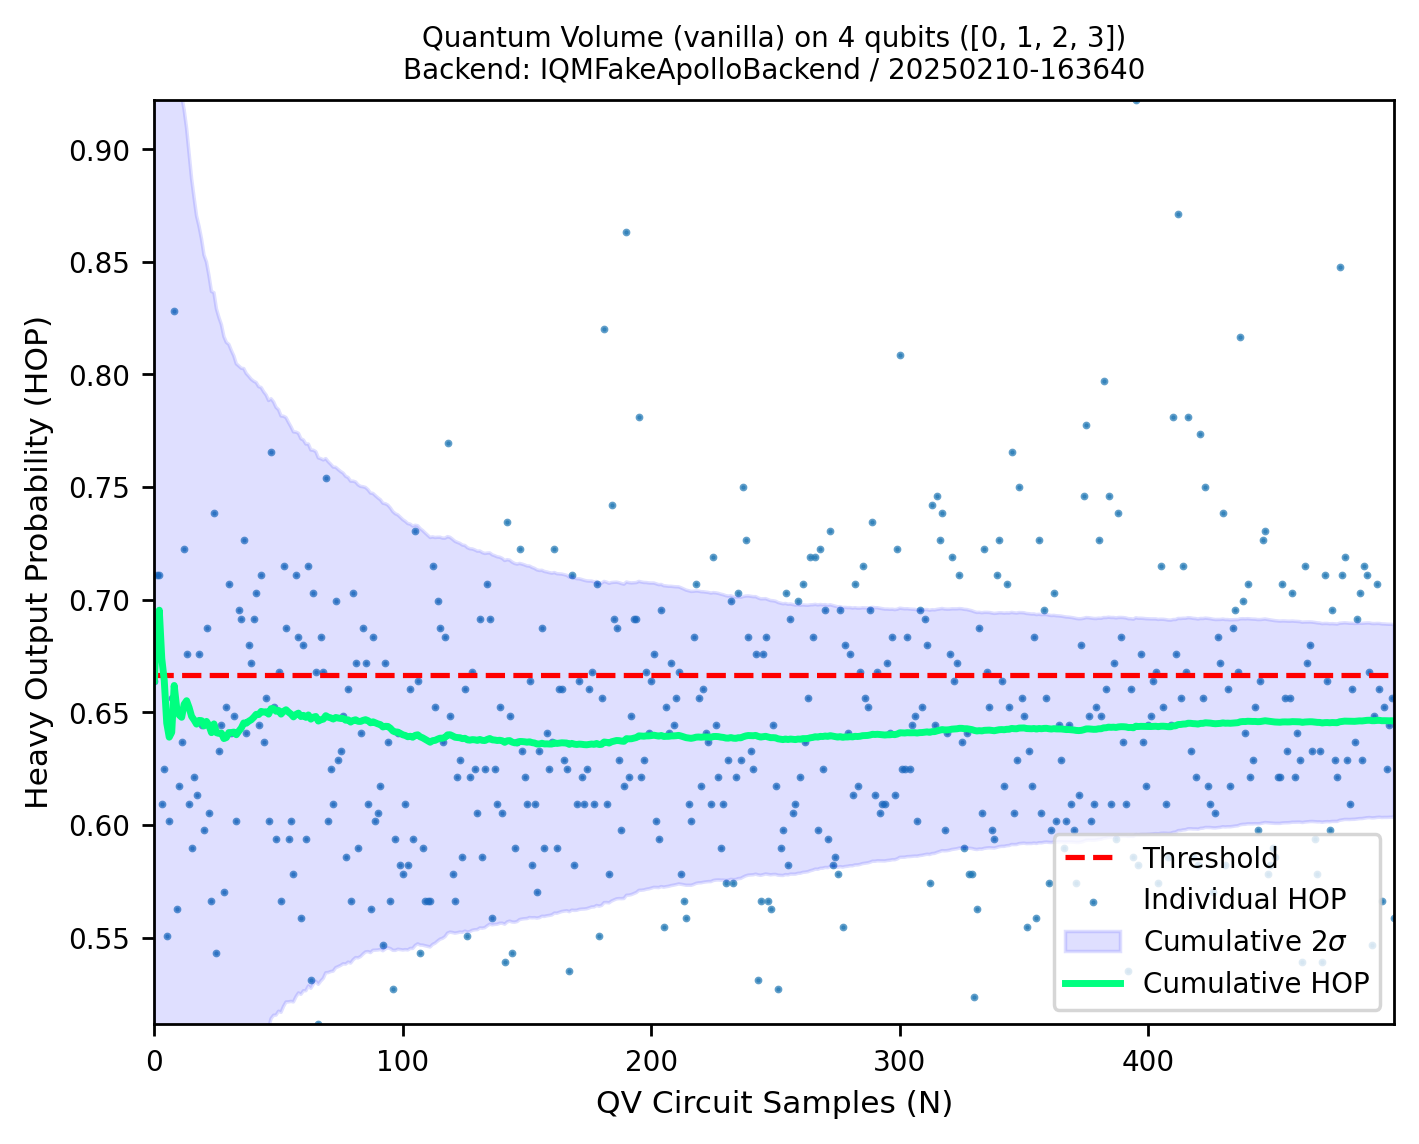

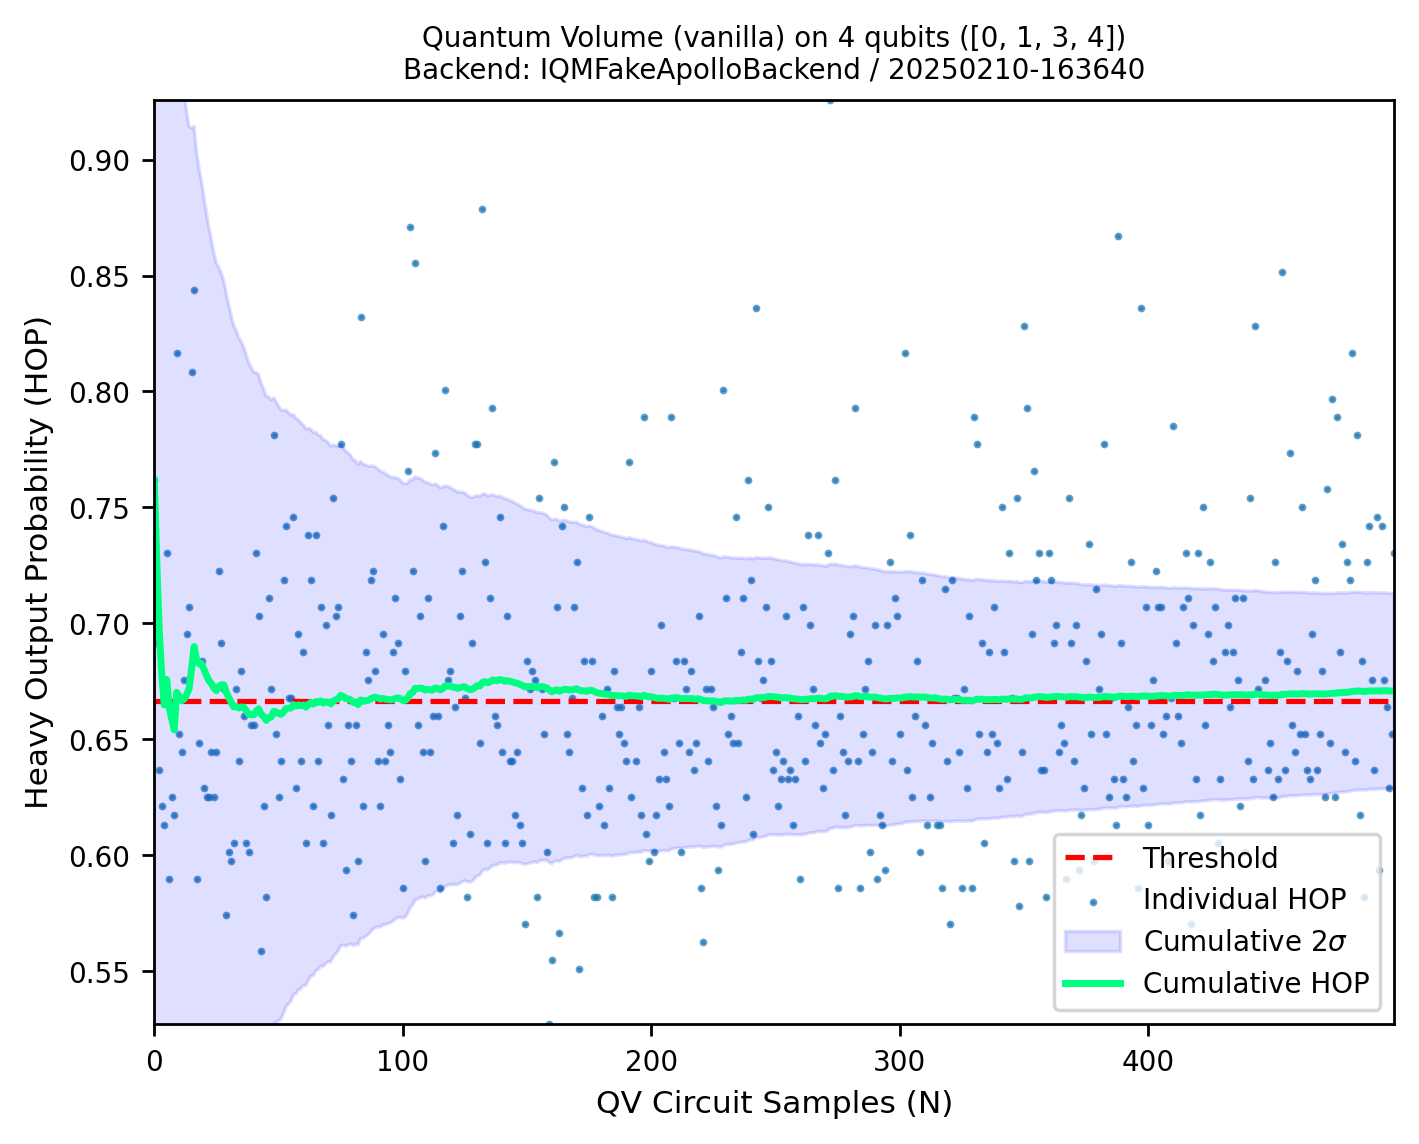

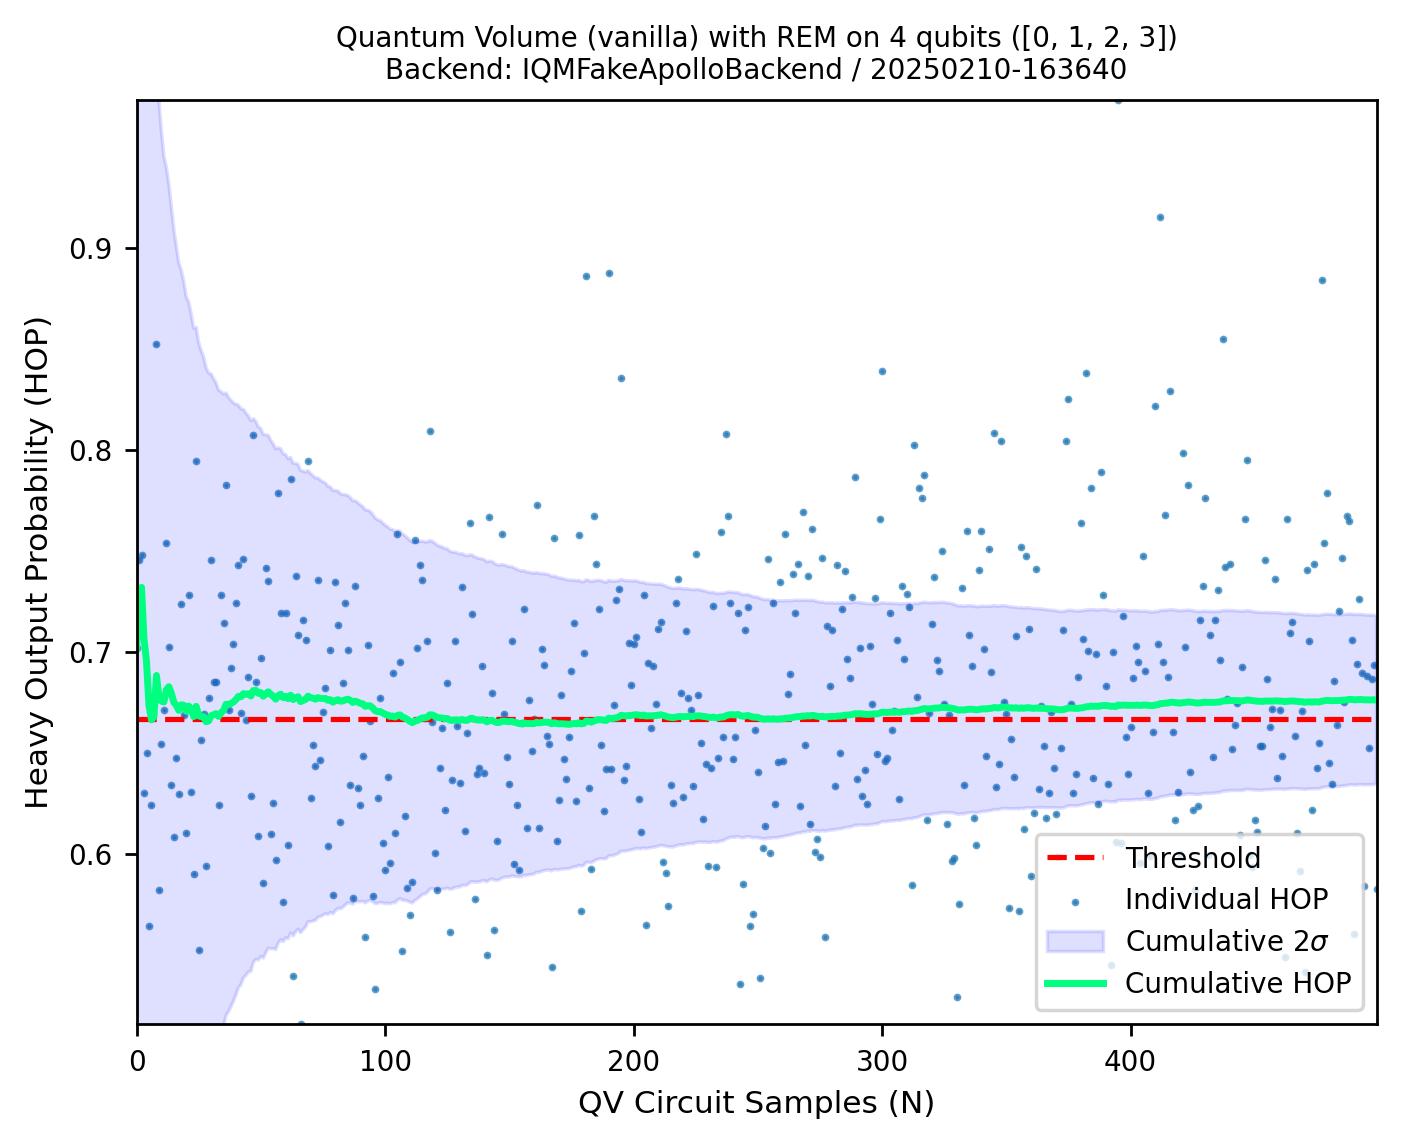

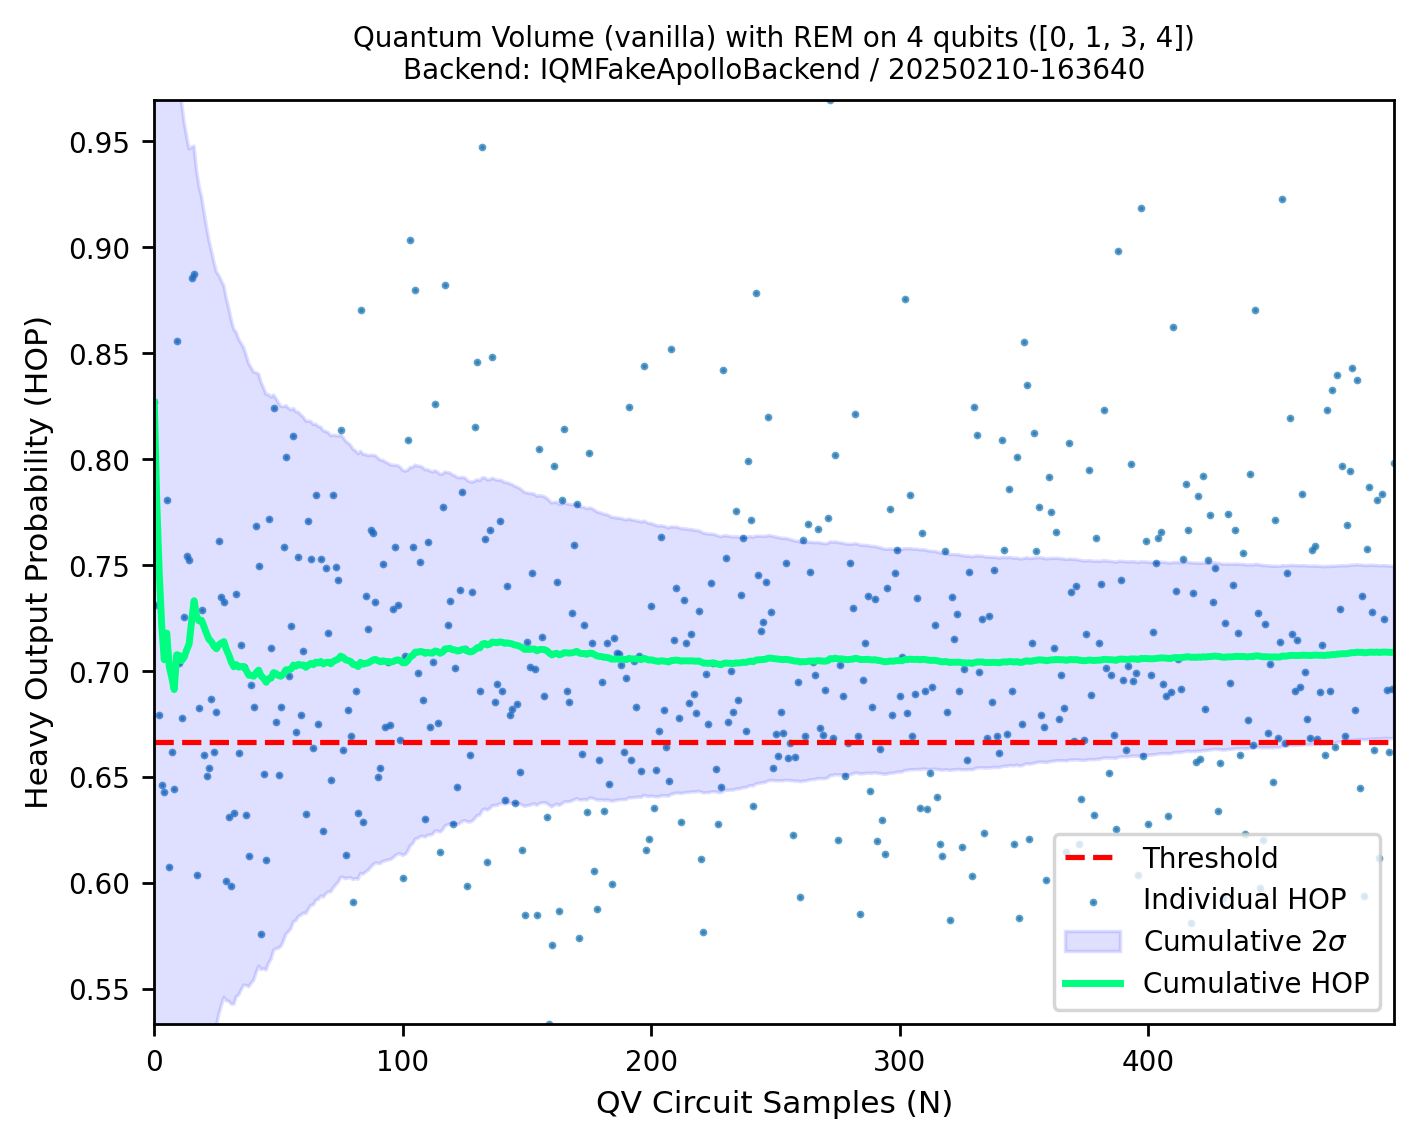

In [18]:
result0_qv.plot_all()